In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [ ]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Label_Encoder = preprocessing.LabelEncoder()

In [ ]:
df['Species']=Label_Encoder.fit_transform(df['Species'])

df['Species'].unique()

array([0, 1, 2])

In [ ]:
df['Species_encoded'] = Label_Encoder.fit_transform(df['Species'])

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,2
146,147,6.3,2.5,5.0,1.9,2,2
147,148,6.5,3.0,5.2,2.0,2,2
148,149,6.2,3.4,5.4,2.3,2,2


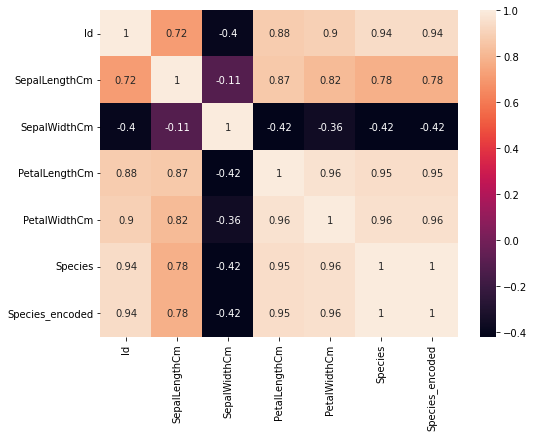

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)

In [ ]:
df.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  ...  PetalWidthCm  Species  Species_encoded
0      1            5.1           3.5  ...           0.2        0                0
1      2            4.9           3.0  ...           0.2        0                0
2      3            4.7           3.2  ...           0.2        0                0
3      4            4.6           3.1  ...           0.2        0                0
4      5            5.0           3.6  ...           0.2        0                0
..   ...            ...           ...  ...           ...      ...              ...
145  146            6.7           3.0  ...           2.3        2                2
146  147            6.3           2.5  ...           1.9        2                2
147  148            6.5           3.0  ...           2.0        2                2
148  149            6.2           3.4  ...           2.3        2                2
149  150            5.9           3.0  ...           1.8 

In [ ]:
x = df[['PetalLengthCm','PetalWidthCm','SepalLengthCm','SepalLengthCm']]
y = df['Species_encoded']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=(0.33))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Knn = KNeighborsClassifier(11)

In [ ]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
predictions = Knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        18

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [ ]:
df.shape

(150, 7)

In [ ]:
150/5

30.0

In [ ]:
30*4

120

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
ks = list(range(1,110,2))

In [ ]:
scores = []

In [ ]:
for k in ks:
  Knn=KNeighborsClassifier(k)
  score=cross_val_score(Knn,x,y,cv=5,scoring="accuracy").mean()
  scores.append(score)
  print(f"{k} neighbours accuracy:{score}")

1 neighbours accuracy:0.9466666666666667
3 neighbours accuracy:0.9666666666666668
5 neighbours accuracy:0.9733333333333334
7 neighbours accuracy:0.9666666666666668
9 neighbours accuracy:0.96
11 neighbours accuracy:0.9666666666666668
13 neighbours accuracy:0.9666666666666668
15 neighbours accuracy:0.9533333333333334
17 neighbours accuracy:0.96
19 neighbours accuracy:0.96
21 neighbours accuracy:0.9466666666666667
23 neighbours accuracy:0.9399999999999998
25 neighbours accuracy:0.9399999999999998
27 neighbours accuracy:0.9400000000000001
29 neighbours accuracy:0.9400000000000001
31 neighbours accuracy:0.9333333333333333
33 neighbours accuracy:0.9333333333333333
35 neighbours accuracy:0.9266666666666665
37 neighbours accuracy:0.9266666666666667
39 neighbours accuracy:0.9266666666666667
41 neighbours accuracy:0.9200000000000002
43 neighbours accuracy:0.9000000000000001
45 neighbours accuracy:0.8933333333333333
47 neighbours accuracy:0.8866666666666667
49 neighbours accuracy:0.88666666666666

In [ ]:
max(scores)

0.9733333333333334

In [ ]:
scores.index(max(scores))

2

In [ ]:
ks[2]

5

In [ ]:
Knn=KNeighborsClassifier(17)
Knn.fit(x_train,y_train)
predictions=Knn.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.89      0.94      0.92        18

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
predictipons1 = svc.predict(x_test)

NotFittedError: ignored

In [ ]:
from sklearn.metrics import confusion_metrix, classification_report

ImportError: ignored